## 第2章 順伝播型ネットワーク

### 2.1 ユニットの出力

図2.2：

In [1]:
from graphviz import Digraph

In [2]:
fig_2_2 = Digraph("fig_2_2", format="svg")
fig_2_2.body.extend(['rankdir=LR'])

fig_2_2.node('x3', u"x3", shape="circle")
fig_2_2.node('x4', u"x4", shape="circle")
fig_2_2.node('x1', u"x1", shape="circle")
fig_2_2.node('x2', u"x2", shape="circle")
fig_2_2.node('u1z1', u"{u1|z1}", shape="Mrecord", width="0.5", height="0.5", margin="0")
fig_2_2.node('u2z2', u"{u2|z2}", shape="Mrecord", width="0.5", height="0.5", margin="0")
fig_2_2.node('u3z3', u"{u3|z3}", shape="Mrecord", width="0.5", height="0.5", margin="0")
fig_2_2.node('z1', u"z1", shape="plaintext", width="0.1", height="0.1", margin="0.1")
fig_2_2.node('z2', u"z2", shape="plaintext", width="0.1", height="0.1", margin="0.1")
fig_2_2.node('z3', u"z3", shape="plaintext", width="0.1", height="0.1", margin="0.1")

fig_2_2.edge('x1', 'u1z1')
fig_2_2.edge('x1', 'u2z2')
fig_2_2.edge('x1', 'u3z3')
fig_2_2.edge('x2', 'u1z1')
fig_2_2.edge('x2', 'u2z2')
fig_2_2.edge('x2', 'u3z3')
fig_2_2.edge('x3', 'u1z1')
fig_2_2.edge('x3', 'u2z2')
fig_2_2.edge('x3', 'u3z3')
fig_2_2.edge('x4', 'u1z1')
fig_2_2.edge('x4', 'u2z2')
fig_2_2.edge('x4', 'u3z3')
fig_2_2.edge('u1z1', 'z1')
fig_2_2.edge('u2z2', 'z2')
fig_2_2.edge('u3z3', 'z3')

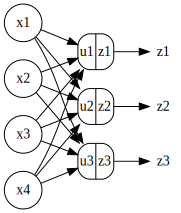

In [3]:
fig_2_2

式2.1〜2.3：

$$
\begin{eqnarray*}
\left[\begin{array}{cc}
u_1 \\ u_2 \\ u_3
\end{array}\right] &=& \left[\begin{array}{cc}
w_{1,1} & w_{1,2} & w_{1,3} & w_{1,4} \\
w_{2,1} & w_{2,2} & w_{2,3} & w_{2,4} \\
w_{3,1} & w_{3,2} & w_{3,3} & w_{3,4}
\end{array}\right] \cdot \left[\begin{array}{cc}
x_1 \\ x_2 \\ x_3 \\ x_4
\end{array}\right] + \left[\begin{array}{cc}
b_1 \\ b_2 \\ b_3
\end{array}\right]
\\
\left[\begin{array}{cc}
z_1 \\ z_2 \\ z_3
\end{array}\right] &=& \left[\begin{array}{cc}
f(u_1) \\ f(u_2) \\ f(u_3)
\end{array}\right]
\end{eqnarray*}
$$

$$
\Downarrow
$$

$$
\begin{eqnarray*}
{\bf u} &=& {\bf Wx} + {\bf b}
\\
{\bf z} &=& {\bf f}({\bf u})
\end{eqnarray*}
$$

TensorFlow の書き方で書くと以下のような感じ：

In [4]:
import tensorflow as tf

入力 ${\bf x} = {}^t[x_1, x_2, \dots , x_I]$：

+ `tf.placeholder()` を利用（訓練データを入れるプレースホルダ）
  + 第1引数は数値の型（例：`tf.float32`）
  + 第2引数は `[None, 《要素数》]`

In [5]:
x = tf.placeholder(tf.float32, [None, 4])

ウェイト ${\bf W} = 《行列》$：

+ `tf.Variable()` を利用（学習パラメータ＝変数）
+ 値は、`tf.zeros()` または `tf.random_normal()` で初期化する。
  + （第1）引数は `[《入力の要素数》, 《出力の要素数＝ユニット数》]`

In [6]:
W = tf.Variable(tf.zeros([4, 3]))
# または
# W = tf.Variable(tf.random_normal([4, 3], mean=0.0, stddev=0.05))

バイアス ${\bf b} = {}^t[b_1, b_2, \dots , b_J]$：

+ `tf.Variable()` を利用（学習パラメータ＝変数）
+ 値は、`tf.zeros()` または `tf.random_normal()` で初期化する。
  + （第1）引数は `[《出力の要素数＝ユニット数》]`

In [7]:
b = tf.Variable(tf.zeros([3]))

ユニットの総入力 ${\bf u} = {}^t[u_1, u_2, \dots , u_J] = {\bf Wx + b}$：

In [8]:
u = tf.matmul(x,  W) + b
# または
# u = tf.add(tf.matmul(x,  W1), b1)

ユニットの出力 ${\bf z} = {}^t[z_1, z_2, \dots , z_J] = {\bf f}({\bf u})$：

In [ ]:
z = f(u)
# ただし f は次節で紹介する「活性化関数」のいずれか。

### 2.2 活性化関数

ロジスティックシグモイド関数（ロジスティック関数）：

$$
\begin{eqnarray*}
f(u) &=& {\rm sigmoid}(u)\\
     &=& \frac{1}{1 + e^{-u}}
\end{eqnarray*}
$$

+ `tf.sigmoid()` という関数が用意されている。

In [ ]:
z = tf.sigmoid(u)

双曲線正接関数：

$$
\begin{eqnarray*}
f(u) &=& \tanh(u)\\
     &=& \frac{e^u - e^{-u}}{e^u + e^{-u}}
\end{eqnarray*}
$$

+ `tf.tanh()` という関数が用意されている。

In [ ]:
z = tf.tanh(u)

正規化線形関数：

$$
f(u) = \max(u, 0)
$$

+ `tf.nn.relu()` という関数が用意されている。

In [ ]:
z = tf.nn.relu(u)

確認：

In [9]:
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


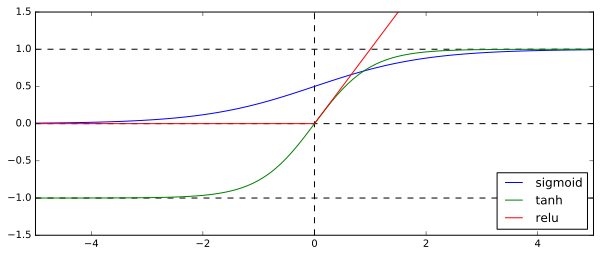

In [10]:
x_linspace = tf.linspace(-5.0, 5.0, 101)
y1 = tf.sigmoid(x_linspace)
y2 = tf.tanh(x_linspace)
y3 = tf.nn.relu(x_linspace)

sess = tf.Session()

_x = sess.run(x_linspace)
plt.figure(figsize=(10, 4))
plt.plot(_x, sess.run(y1), label="sigmoid")
plt.plot(_x, sess.run(y2), label="tanh")
plt.plot(_x, sess.run(y3), label="relu")
plt.xlim(-5.0, 5.0)
plt.ylim(-1.5, 1.5)
plt.hlines([-1.0, 0.0, 1.0], -5.0, 5.0, linestyles="dashed")
plt.vlines(0, -1.5, 1.5, linestyles="dashed")
plt.legend(loc='lower right')

参考：TensorFlow に用意されているその他の活性化関数

$$
\begin{eqnarray*}
{\rm ReLU_6} &:& \min(\max(u, 0), 6)\\
{\rm ELU} &:& \left \{ \begin{array}{} u &\ (u \ge 0)\\ e^u - 1 &\ (u < 0) \end{array} \right. \\
{\rm softplus} &:& \ln(e^u + 1)\\
{\rm softsign} &:& \frac{u}{|u|+1}\\
\end{eqnarray*}
$$

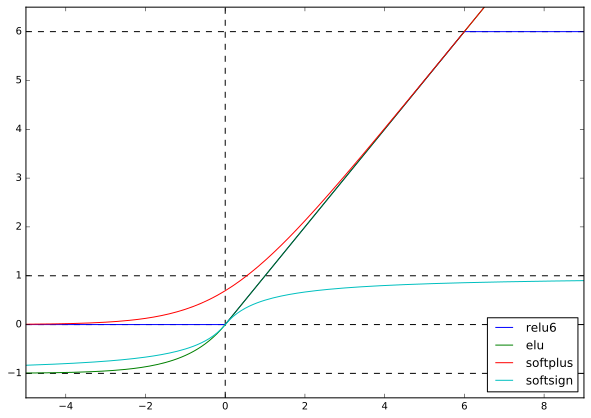

In [11]:
x2 = tf.linspace(-5.0, 9.0, 141)
_x = sess.run(x2)
plt.figure(figsize=(10, 7))
plt.plot(_x, sess.run(tf.nn.relu6(x2)), label="relu6")
plt.plot(_x, sess.run(tf.nn.elu(x2)), label="elu")
plt.plot(_x, sess.run(tf.nn.softplus(x2)), label="softplus")
plt.plot(_x, sess.run(tf.nn.softsign(x2)), label="softsign")
plt.xlim(-5.0, 9.0)
plt.ylim(-1.5, 6.5)
plt.hlines([-1.0, 0.0, 1.0, 6.0], -5.0, 9.0, linestyles="dashed")
plt.vlines(0, -1.5, 6.5, linestyles="dashed")
plt.legend(loc='lower right')

※恒等写像（${\bf f}({\bf u}) = {\bf u}$）、マックスアウト（${\bf f}({\bf u}) = \max u_k$）は省略

### 2.3 多層ネットワーク

2層（入力層、隠れ層1、出力層）の例： 

$$
\begin{eqnarray*}
{\bf u}^{(2)} &=& {\bf W}^{(2)}{\bf x} + {\bf b}^{(2)}\\
{\bf z}^{(2)} &=& {\bf f}^{(2)}({\bf u}^{(2)})\\
& &\\
{\bf u}^{(3)} &=& {\bf W}^{(3)}{\bf z}^{(2)} + {\bf b}^{(3)}\\
{\bf z}^{(3)} &=& {\bf f}^{(3)}({\bf u}^{(3)})\\
\end{eqnarray*}
$$

TensorFlow でも、これを丁寧に1つずつコードに落とせばOK。

In [12]:
# 入力層→隠れ層
x = tf.placeholder(tf.float32, [None, 4])
W2 = tf.Variable(tf.zeros([4, 3]))
b2 = tf.Variable(tf.zeros([3]))
u2 = tf.matmul(x,  W2) + b2
z2 = tf.nn.relu(u2)

In [13]:
# 隠れ層→出力層
# z2: ↑の出力
W3 = tf.Variable(tf.zeros([3, 2]))
b3 = tf.Variable(tf.zeros([2]))
u3 = tf.matmul(z2, W3) + b3
z3 = tf.nn.softmax(u3)

最終的な出力 ${\bf y} = {\bf y}({\bf x}; {\bf w})$

In [14]:
y = z3

### 2.4 出力層の設計と誤差関数

#### 2.4.1 学習の枠組み

表2.1：

問題の種別  | 出力層の活性化関数  | 誤差関数
--- | --- | ---
回帰 | 恒等写像 | 二乗誤差関数
二値分類 | ロジスティック関数 | （交差エントロピー関数）
多クラス分類 | ソフトマックス関数 | 交差エントロピー関数

※訓練データ（正解のデータ）${\bf d} = {}^t[y_1, y_2, \dots , y_J]$：

+ 入力データ ${\bf x}$ と同様、`tf.placeholder()` を利用（訓練データを入れるプレースホルダ）
  + 第1引数は数値の型（例：`tf.float32`）
  + 第2引数は `[None, 《要素数》]`

In [16]:
d = tf.placeholder(tf.float32, [None, 2])

※ **誤差関数**とは、最終的な出力 ${\bf y}$ と、訓練データ（正解データ）${\bf d}$ との「誤差」を測る関数、と言う意味。  
※ 誤差関数の値が最小となるようなパラメータ ${\bf w}$（${\bf W}^{(2)}, {\bf b}^{(2)}, \dots , {\bf W}^{(L)}, {\bf b}^{(L)}$）を決めて行くのが「学習」する、ということ。

#### 2.4.2 回帰

出力層で、活性化関数を利用せずに ${\bf u}^L$ の結果をそのまま最終的な出力 ${\bf y}$ として扱えばOK。  
誤差関数は**二乗誤差関数**を利用：

$$
E({\bf w}) = \frac{1}{2} \sum_n \left\| {\bf d}_n - {\bf y}({\bf x}_n; {\bf w}) \right\|^2
$$

例：

In [ ]:
e = tf.reduce_mean(tf.square(d - u3))

※ ↑ $1/2$ を掛けていないが、定数倍なので結果に影響ないため省略している。

#### 2.4.3 二値分類

出力層の活性化関数としては、ロジスティック関数を利用。  
誤差関数は（二値の）交差エントロピー：

$$
E({\bf w}) = - \sum_n \left[ d_n \log(y({\bf x}_n; {\bf w})) + (1 - d_n) \log(1 - y({\bf x}_n; {\bf w})) \right]
$$

TensorFlow では、この式を直接表せる関数が用意されている：

In [ ]:
x_entropy = tf.nn.sigmoid_cross_entropy_with_logits(u3, d)

※ ↑`tf.nn.sigmoid_cross_entropy_with_logits()` 関数が内部で `tf.sigmoid()` 関数を利用するので、`z3 = tf.sigmoid(u3)` 不要。

#### 2.4.4 多クラス分類